## Import Library 

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import math
import csv
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict, train_test_split
from skimage.filters import prewitt
from skimage.morphology import closing, skeletonize, square
from skimage.exposure import rescale_intensity
from skimage.filters import threshold_otsu
from skimage.util import img_as_ubyte
from skimage.feature import graycomatrix, graycoprops
from skimage import io, color

## Load Data

In [19]:
def load_images(folder_path):
    images = []
    image_names = []
    
    try:
        files = os.listdir(folder_path)
        
        for file in files:
            full_path = os.path.join(folder_path, file)
            name, extension = os.path.splitext(file)
            
            try:
                image = cv.imread(full_path)
                if image is None:
                    raise Exception("Gagal membaca gambar")
                
                images.append(image.astype(np.uint8))
                image_names.append(name)
            except cv.error as e:
                print(f"Kesalahan saat membaca gambar {file}: {e}")
            except Exception as e:
                print(f"Kesalahan saat memproses gambar {file}: {e}")
    
    except FileNotFoundError:
        print(f"Folder tidak ditemukan: {folder_path}")
    except Exception as e:
        print(f"Kesalahan saat memproses folder {folder_path}: {e}")
    
    return images, image_names

In [18]:
def write_image(images, file_names, folder_path):
    for i in range(len(images)):
        img = images[i].astype(np.uint8)
        min_value = np.min(img)
        max_value = np.max(img)
        
        normalized_image = (img - min_value) / (max_value - min_value)
        uint8_image = (normalized_image * 255).astype(np.uint8)
        
        resized_img = cv.resize(uint8_image, (500, 500), interpolation=cv.INTER_NEAREST)
        images[i] = resized_img
        
        save_path = folder_path + file_names[i] + ".jpg"
        cv.imwrite(save_path, images[i])

In [25]:
images, file_names = load_images('dataset/Curved Mayo Scissor/')
write_image(images, file_names, './data/CurvedMayoScissor/')

images, file_names = load_images('dataset/Scalpel/')
write_image(images, file_names, './data/Scalpel/')

images, file_names = load_images('dataset/Straight Dissection Clamp/')
write_image(images, file_names, './data/StraightDissectionClamp/')

images, file_names = load_images('dataset/Straight Mayo Scissor/')
write_image(images, file_names, './data/StraightMayoScissor/')

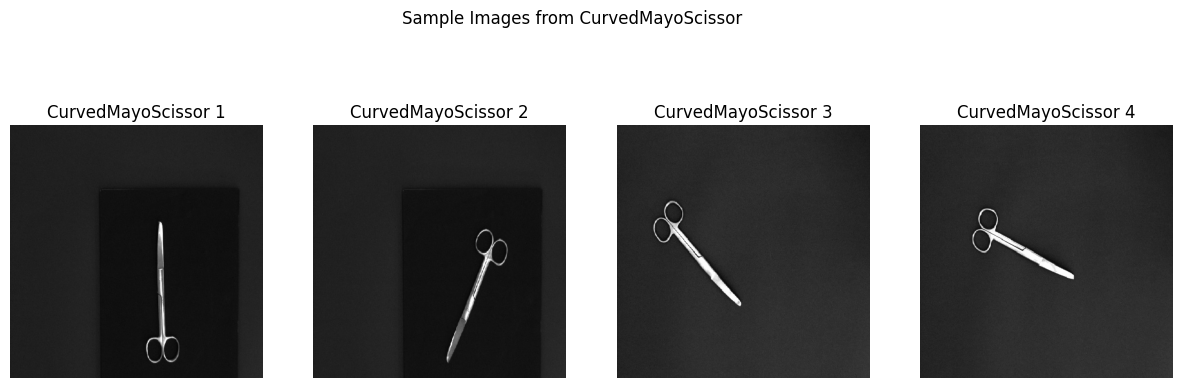

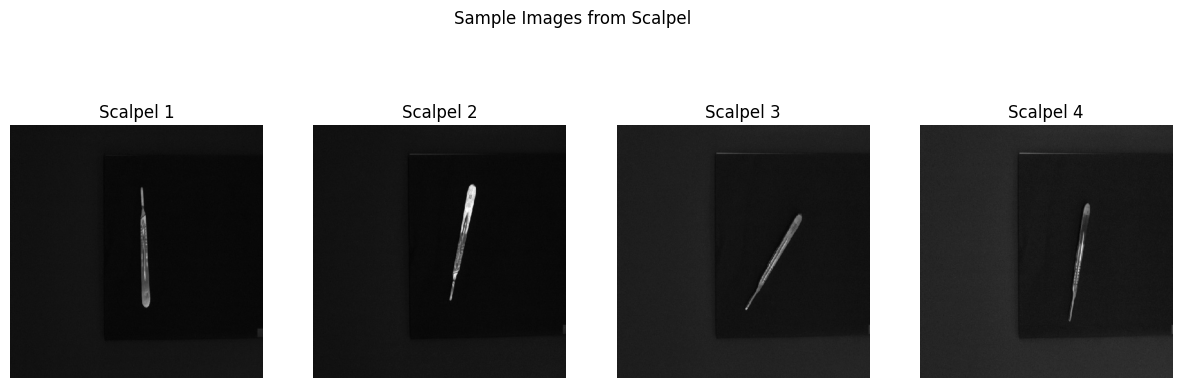

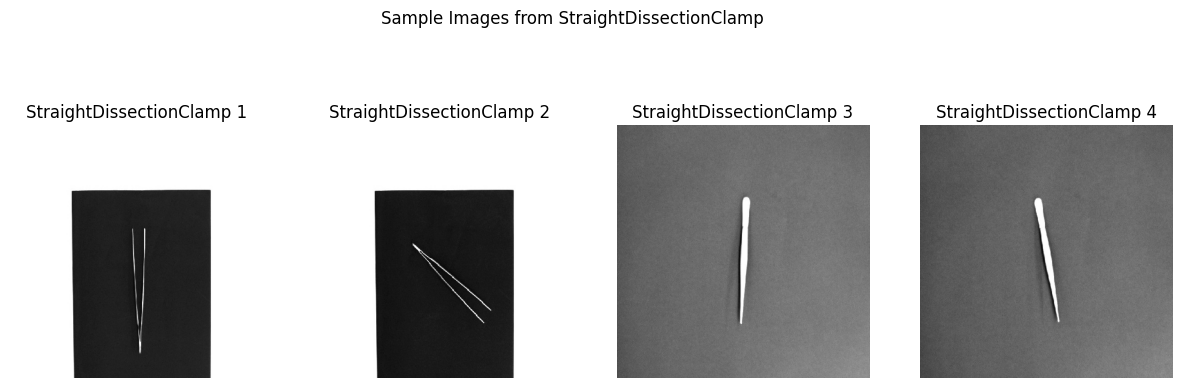

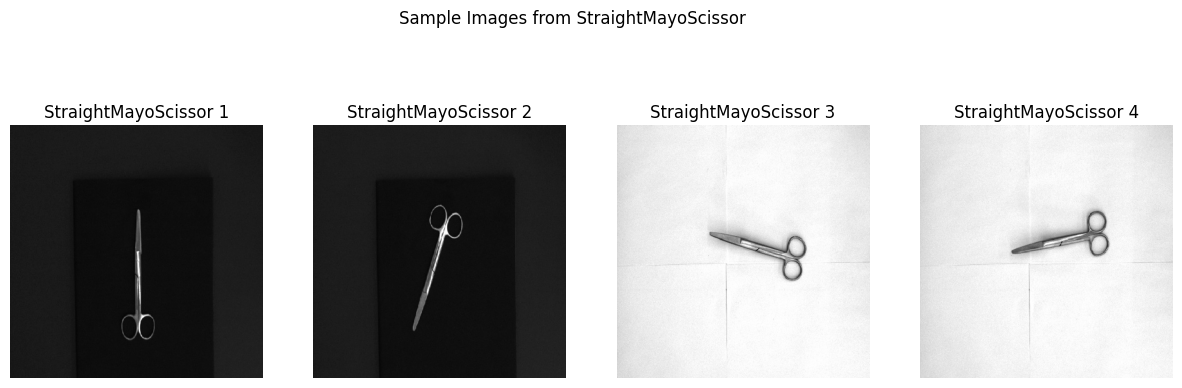

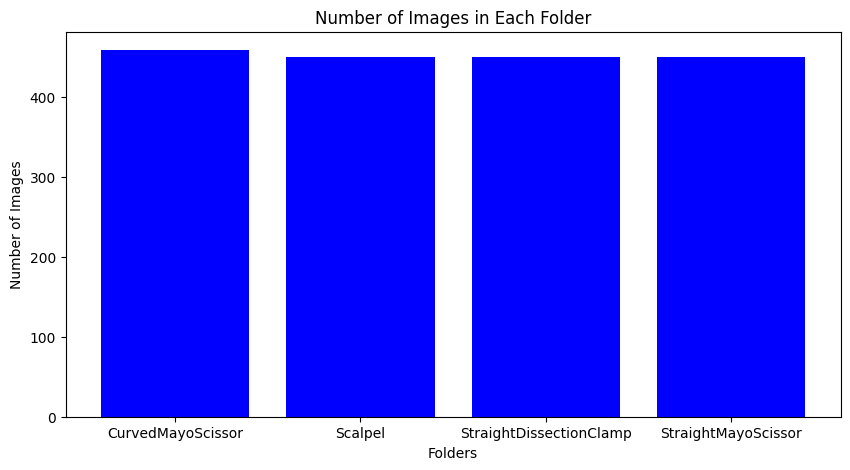

In [26]:
def load_images(folder_path):
    images = []
    image_names = []
    
    try:
        files = os.listdir(folder_path)
        for file in files:
            full_path = os.path.join(folder_path, file)
            name, extension = os.path.splitext(file)
            try:
                image = cv.imread(full_path)
                if image is None:
                    raise Exception("Gagal membaca gambar")
                images.append(image.astype(np.uint8))
                image_names.append(name)
            except cv.error as e:
                print(f"Kesalahan saat membaca gambar {file}: {e}")
            except Exception as e:
                print(f"Kesalahan saat memproses gambar {file}: {e}")
    except FileNotFoundError:
        print(f"Folder tidak ditemukan: {folder_path}")
    except Exception as e:
        print(f"Kesalahan saat memproses folder {folder_path}: {e}")
    
    return images, image_names

def write_image(images, file_names, folder_path):
    for i in range(len(images)):
        img = images[i].astype(np.uint8)
        min_value = np.min(img)
        max_value = np.max(img)
        normalized_image = (img - min_value) / (max_value - min_value)
        uint8_image = (normalized_image * 255).astype(np.uint8)
        resized_img = cv.resize(uint8_image, (500, 500), interpolation=cv.INTER_NEAREST)
        images[i] = resized_img
        save_path = folder_path + file_names[i] + ".jpg"
        cv.imwrite(save_path, images[i])

images, file_names = load_images('dataset/Curved Mayo Scissor/')
write_image(images, file_names, './data/CurvedMayoScissor/')

images, file_names = load_images('dataset/Scalpel/')
write_image(images, file_names, './data/Scalpel/')

images, file_names = load_images('dataset/Straight Dissection Clamp/')
write_image(images, file_names, './data/StraightDissectionClamp/')

images, file_names = load_images('dataset/Straight Mayo Scissor/')
write_image(images, file_names, './data/StraightMayoScissor/')

# Display sample images from each folder
data_folder_paths = [
    './data/CurvedMayoScissor/', 
    './data/Scalpel/', 
    './data/StraightDissectionClamp/', 
    './data/StraightMayoScissor/'
]

def display_sample_images(folders, sample_count=4):
    for folder_path in folders:
        folder_name = os.path.basename(folder_path.strip('/'))
        try:
            files = os.listdir(folder_path)
            plt.figure(figsize=(15, 5))
            plt.suptitle(f'Sample Images from {folder_name}')
            for i in range(min(sample_count, len(files))):
                file_path = os.path.join(folder_path, files[i])
                img = cv.imread(file_path)
                if img is not None:
                    plt.subplot(1, sample_count, i + 1)
                    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
                    plt.title(f'{folder_name} {i + 1}')
                    plt.axis('off')
                else:
                    print(f"Error reading image: {file_path}")
            plt.show()
        except FileNotFoundError:
            print(f"Folder not found: {folder_path}")
        except Exception as e:
            print(f"Error processing folder {folder_path}: {e}")

# Display sample images from each folder
display_sample_images(data_folder_paths)

def plot_image_counts(folders):
    folder_names = []
    image_counts = []
    
    for folder_path in folders:
        folder_name = os.path.basename(folder_path.strip('/'))
        try:
            files = os.listdir(folder_path)
            image_count = len(files)
            folder_names.append(folder_name)
            image_counts.append(image_count)
        except FileNotFoundError:
            print(f"Folder not found: {folder_path}")
        except Exception as e:
            print(f"Error processing folder {folder_path}: {e}")
    
    plt.figure(figsize=(10, 5))
    plt.bar(folder_names, image_counts, color='blue')
    plt.xlabel('Folders')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Folder')
    plt.show()

# Plot the number of images in each folder
plot_image_counts(data_folder_paths)


## Data Preparation

### Data Augmentation

In [27]:
# Function for mirroring
def mirror_image(image, mode):
    if mode == 'horizontal':
        return cv.flip(image, 1)  # Horizontal flip
    elif mode == 'vertical':
        return cv.flip(image, 0)  # Vertical flip
    elif mode == 'both':
        return cv.flip(image, -1)  # Both horizontal and vertical flip

# Function for translation
def translate_image(image, x_shift, y_shift):
    height, width = image.shape[:2]
    translation_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    return cv.warpAffine(image, translation_matrix, (width, height))

# Function for scaling
def scale_image(image, scale_factor):
    height, width = image.shape[:2]
    new_dimensions = (int(width * scale_factor), int(height * scale_factor))
    return cv.resize(image, new_dimensions, interpolation=cv.INTER_LINEAR)

# Function for augmenting images with mirroring, translation, and scaling
def augment_images(image_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    for filename in os.listdir(image_dir):
        image_path = os.path.join(image_dir, filename)
        image = cv.imread(image_path)

        if image is None:
            print(f"Error reading image: {filename}")
            continue

        base_name = os.path.splitext(filename)[0]

        # Mirroring
        for mode in ['horizontal', 'vertical', 'both']:
            mirrored_image = mirror_image(image, mode)
            output_filename = f'{base_name}_mirrored_{mode}.jpg'
            output_path = os.path.join(output_dir, output_filename)
            cv.imwrite(output_path, mirrored_image)

        # Translation
        for x_shift, y_shift in [(30, 30), (-30, -30), (30, -30), (-30, 30)]:
            translated_image = translate_image(image, x_shift, y_shift)
            output_filename = f'{base_name}_translated_{x_shift}_{y_shift}.jpg'
            output_path = os.path.join(output_dir, output_filename)
            cv.imwrite(output_path, translated_image)

        # Scaling
        for scale_factor in [0.5, 1.5, 2.0]:
            scaled_image = scale_image(image, scale_factor)
            output_filename = f'{base_name}_scaled_{scale_factor}.jpg'
            output_path = os.path.join(output_dir, output_filename)
            cv.imwrite(output_path, scaled_image)

# Run augmentation
augment_images('data/CurvedMayoScissor', 'augmented/CurvedMayoScissor/')
augment_images('data/Scalpel', 'augmented/Scalpel/')
augment_images('data/StraightDissectionClamp', 'augmented/StraightDissectionClamp/')
augment_images('data/StraightMayoScissor', 'augmented/StraightMayoScissor/')

## Data Processing

In [28]:
def convert_to_grayscale_and_save(input_dir, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Iterate through all directories in the input directory
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            # Construct full file path
            file_path = os.path.join(root, file)
            
            # Read the image
            image = cv.imread(file_path)
            if image is None:
                print(f"Error reading image: {file_path}")
                continue
            
            # Convert image to grayscale
            gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            
            # Get the relative path and construct output path
            relative_path = os.path.relpath(root, input_dir)
            output_sub_dir = os.path.join(output_dir, relative_path)
            
            # Ensure the sub-directory exists
            if not os.path.exists(output_sub_dir):
                os.makedirs(output_sub_dir)
            
            # Construct the full output path for the grayscale image
            output_file_path = os.path.join(output_sub_dir, file)
            
            # Write the grayscale image to the output directory
            cv.imwrite(output_file_path, gray_image)
            print(f"Saved grayscale image to: {output_file_path}")

# Convert and save grayscale images
augment_images('augmented/CurvedMayoScissor/', 'augmented-dataset/CurvedMayoScissor/')
augment_images('augmented/Scalpel/', 'augmented-dataset/Scalpel/')
augment_images('augmented/StraightDissectionClamp/', 'augmented-dataset/StraightDissectionClamp/')
augment_images('augmented/StraightMayoScissor/', 'augmented-dataset/StraightMayoScissor/')

In [30]:
def normalize(image):
    return rescale_intensity(image, in_range='image', out_range=(0, 1))

def tresholding(image, threshold_value=None):
    if threshold_value is None:
        threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value
    return binary_image

def preprocess_image(image):
    image = prewitt(image)
    image = normalize(image)
    image = tresholding(image)
    image = skeletonize(image)
    image = closing(image, square(3))
    image = img_as_ubyte(image)
    return image

def process_and_save_images(input_dir, output_dir, num_images=150):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for root, dirs, files in os.walk(input_dir):
        relative_path = os.path.relpath(root, input_dir)
        output_sub_dir = os.path.join(output_dir, relative_path)
        
        if not os.path.exists(output_sub_dir):
            os.makedirs(output_sub_dir)
        
        if len(files) > 0:
            sampled_files = random.sample(files, min(num_images, len(files)))
            for file in sampled_files:
                file_path = os.path.join(root, file)
                image = cv.imread(file_path, cv.IMREAD_GRAYSCALE)
                if image is None:
                    print(f"Error reading image: {file_path}")
                    continue
                
                processed_image = preprocess_image(image)
                output_file_path = os.path.join(output_sub_dir, file)
                cv.imwrite(output_file_path, processed_image)
                print(f"Saved processed image to: {output_file_path}")


input_dirs = [
    'augmented/CurvedMayoScissor',
    'augmented/Scalpel',
    'augmented/StraightDissectionClamp',
    'augmented/StraightMayoScissor'
]
output_dirs = [
    'random-dataset/CurvedMayoScissor',
    'random-dataset/Scalpel',
    'random-dataset/StraightDissectionClamp',
    'random-dataset/StraightMayoScissor'
]

# Select and save random images
for input_dir, output_dir in zip(input_dirs, output_dirs):
    process_and_save_images(input_dir, output_dir, num_images=150)

Saved processed image to: random-dataset/CurvedMayoScissor\.\tesouracurva319_mirrored_horizontal.jpg
Saved processed image to: random-dataset/CurvedMayoScissor\.\tesouracurva225_translated_30_30.jpg
Saved processed image to: random-dataset/CurvedMayoScissor\.\tesouracurva4_mirrored_horizontal.jpg
Saved processed image to: random-dataset/CurvedMayoScissor\.\tesouracurva393_translated_30_-30.jpg
Saved processed image to: random-dataset/CurvedMayoScissor\.\tesouracurva220_translated_-30_30.jpg
Saved processed image to: random-dataset/CurvedMayoScissor\.\tesouracurva114_translated_30_30.jpg
Saved processed image to: random-dataset/CurvedMayoScissor\.\tesouracurva434_scaled_1.5.jpg
Saved processed image to: random-dataset/CurvedMayoScissor\.\tesouracurva401_scaled_1.5.jpg
Saved processed image to: random-dataset/CurvedMayoScissor\.\tesouracurva397_scaled_0.5.jpg
Saved processed image to: random-dataset/CurvedMayoScissor\.\tesouracurva87_mirrored_both.jpg
Saved processed image to: random-dat

In [17]:
import os
import numpy as np
import pandas as pd
from skimage import io, color
from skimage.feature import graycomatrix, graycoprops

# Fungsi untuk menghitung GLCM untuk satu sudut
def glcm(image, angle):
    d = {
        0: (0, 1),
        45: (-1, 1),
        90: (-1, 0),
        135: (-1, -1)
    }
    if angle not in d:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    d = d[angle]
    glcm = graycomatrix(image, distances=[1], angles=[angle], levels=256, symmetric=True, normed=True)
    return glcm.squeeze()

# Fungsi untuk menghitung properti GLCM
def calc_properties(glcm):
    I, J = np.ogrid[0:glcm.shape[0], 0:glcm.shape[1]]
    contrast = np.sum(glcm * (I - J) ** 2)
    dissimilarity = np.sum(glcm * np.abs(I - J))
    homogeneity = np.sum(glcm / (1.0 + (I - J) ** 2))
    ASM = np.sum(glcm ** 2)
    energy = np.sqrt(ASM)
    entropy = -np.sum(glcm * np.log2(glcm + (glcm == 0)))
    mean_i = np.sum(I * glcm)
    mean_j = np.sum(J * glcm)
    std_i = np.sqrt(np.sum((I - mean_i) ** 2 * glcm))
    std_j = np.sqrt(np.sum((J - mean_j) ** 2 * glcm))
    correlation = np.sum(((I - mean_i) * (J - mean_j) * glcm) / (std_i * std_j + (std_i * std_j == 0)))
    
    return contrast, dissimilarity, homogeneity, ASM, energy, entropy, correlation

# Daftar folder dan label
folders = [
    ('random-dataset/CurvedMayoScissor', 'CurvedMayoScissor'),
    ('random-dataset/Scalpel', 'Scalpel'),
    ('random-dataset/StraightDissectionClamp', 'StraightDissectionClamp'),
    ('random-dataset/StraightMayoScissor', 'StraightMayoScissor')
]

# Sudut-sudut yang digunakan untuk GLCM
angles = [0, 45, 90, 135]

# Penyimpanan hasil ekstraksi
results = {f"{prop}{angle}": [] for angle in angles for prop in ["Contrast", "Dissimilarity", "Homogeneity", "ASM", "Energy", "Entropy", "Correlation"]}
file_names = []
labels = []

# Proses setiap folder
for folder, label in folders:
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        
        # Baca gambar dan konversi ke grayscale jika perlu
        image = io.imread(file_path)
        if image.ndim == 3:
            image = color.rgb2gray(image)
        image = (image * 255).astype(np.uint8)  # Konversi ke tipe uint8
        
        file_names.append(file)
        labels.append(label)
        
        # Hitung GLCM dan properti untuk setiap sudut
        for angle in angles:
            glcm_matrix = glcm(image, angle)
            props = calc_properties(glcm_matrix)
            for prop, value in zip(["Contrast", "Dissimilarity", "Homogeneity", "ASM", "Energy", "Entropy", "Correlation"], props):
                results[f"{prop}{angle}"].append(value)

# Buat DataFrame dari hasil ekstraksi
dataTable = {'Filename': file_names, 'Label': labels}
dataTable.update(results)
df = pd.DataFrame(dataTable)

# Simpan ke CSV
csv_filename = 'glcmdataset.csv'
df.to_csv(csv_filename, index=False)

print(f'Hasil ekstraksi GLCM telah disimpan ke file: {csv_filename}')

# Baca hasil dari file CSV
hasilEkstrak = pd.read_csv('glcmdataset.csv')
print(hasilEkstrak.head())


Hasil ekstraksi GLCM telah disimpan ke file: glcmdataset.csv
                                Filename              Label    Contrast0  \
0         tesouracurva101_scaled_0.5.jpg  CurvedMayoScissor  1221.317430   
1         tesouracurva105_scaled_2.0.jpg  CurvedMayoScissor   588.145459   
2   tesouracurva105_translated_30_30.jpg  CurvedMayoScissor   913.913122   
3  tesouracurva106_translated_-30_30.jpg  CurvedMayoScissor   857.755551   
4   tesouracurva106_translated_30_30.jpg  CurvedMayoScissor   898.450204   

   Dissimilarity0  Homogeneity0      ASM0   Energy0  Entropy0  Correlation0  \
0        4.828048      0.974816  0.936277  0.967614  0.364372      0.190589   
1        2.322410      0.988779  0.973515  0.986669  0.165547      0.195563   
2        3.610982      0.981891  0.956223  0.977867  0.261681      0.201049   
3        3.390212      0.982390  0.955956  0.977730  0.264004      0.199582   
4        3.550725      0.981784  0.954923  0.977202  0.269678      0.198445   

   Cont

<Axes: >

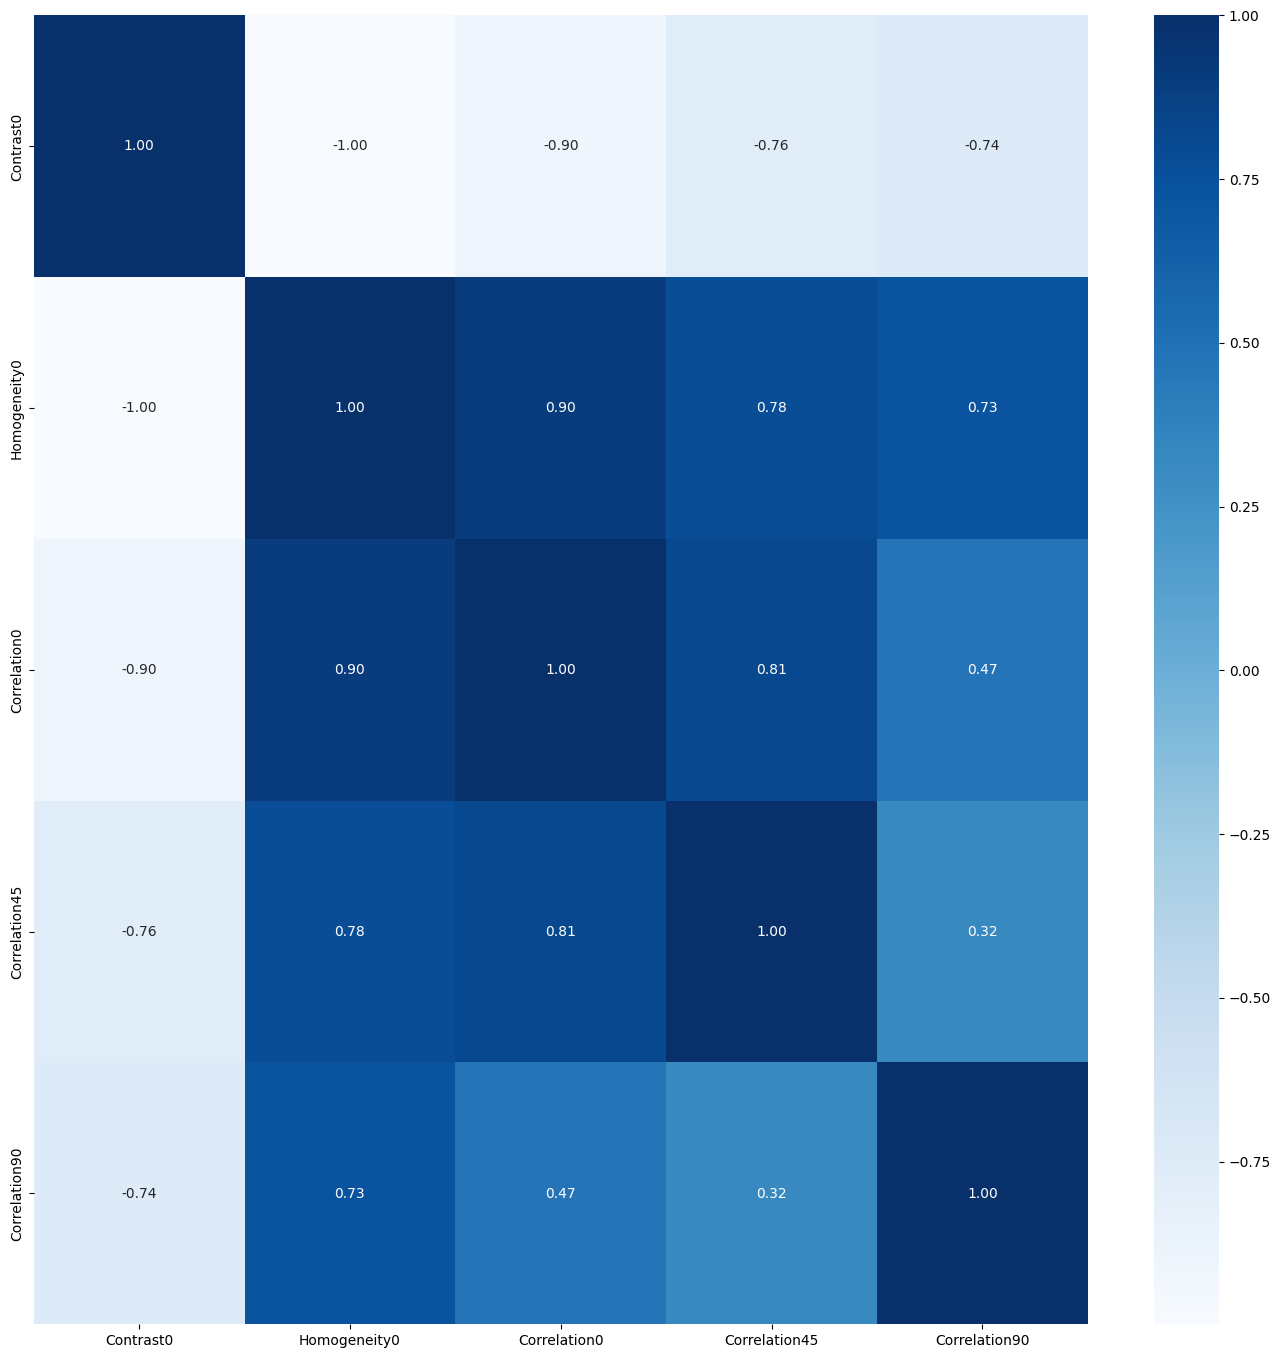

In [19]:
glcmdataset = pd.read_csv('glcmdataset.csv')

# Menghitung korelasi
correlation = glcmdataset.drop(columns=['Label','Filename']).corr()

# Menyaring fitur yang memiliki korelasi absolut lebih dari 0.95 dengan label
threshold = 0.95
selectionFeature = []
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
	for j in range(i+1, correlation.shape[0]):
		if correlation.iloc[i,j] >= threshold:
			if columns[j]:
				columns[j] = False
select = glcmdataset.drop(columns=['Label','Filename']).columns[columns]
x_new = glcmdataset[select]
x_new
y = glcmdataset['Label']
plt.figure(figsize=(17,17))
sns.heatmap(x_new.corr(), annot=True, cmap='Blues', fmt=".2f")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)
print(X_train)
print(X_test)

        Contrast0  Homogeneity0  Correlation0  Correlation45  Correlation90
108   5488.528792      0.876575      0.141535       0.253692       0.223952
272    340.351182      0.991959      0.162368       0.309658       0.196891
599    782.785387      0.983852      0.205993       0.311566       0.201869
479    575.889317      0.988325      0.204609       0.322848       0.197924
436    949.057876      0.981520      0.218943       0.345516       0.192411
..            ...           ...           ...            ...            ...
71    9768.684273      0.800118      0.128864       0.250888       0.121411
106  10555.329474      0.797939      0.125164       0.280935       0.109821
270   6334.327134      0.872899      0.161759       0.275881       0.158171
435    921.501126      0.978334      0.158070       0.239318       0.348231
102  12772.391667      0.749300      0.104582       0.262936       0.083823

[420 rows x 5 columns]
        Contrast0  Homogeneity0  Correlation0  Correlation45  Co

In [23]:
X_test = (X_test - X_train.mean()) / X_train.std()
X_train = (X_train - X_train.mean()) / X_train.std()

In [36]:
def crossValidation(x, y, model):
    y_pred = cross_val_predict(model, x, y, cv=20)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro', zero_division=1)
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')
    return y_pred, accuracy, precision, recall, f1


print("KNN")
y_pred_knn, akurasiKNN, presisiKNN, recallKNN, f1KNN = crossValidation(x_new, y, KNeighborsClassifier(n_neighbors=15))

print("\nRandom Forest")
y_pred_rforest, akurasiRForest, presisiRForest, recallRForest, f1RForest = crossValidation(x_new, y, RandomForestClassifier(n_estimators=175, random_state=42))

print("\nSVM")
y_pred_svm, akurasiSVM, presisiSVM, recallSVM, f1SVM = crossValidation(x_new, y, SVC(kernel='rbf', random_state=42))

KNN
Accuracy: 44.50%
Precision: 44.27%
Recall: 44.50%
F1 Score: 43.66%

Random Forest
Accuracy: 47.33%
Precision: 47.24%
Recall: 47.33%
F1 Score: 47.15%

SVM
Accuracy: 37.67%
Precision: 38.11%
Recall: 37.67%
F1 Score: 31.78%


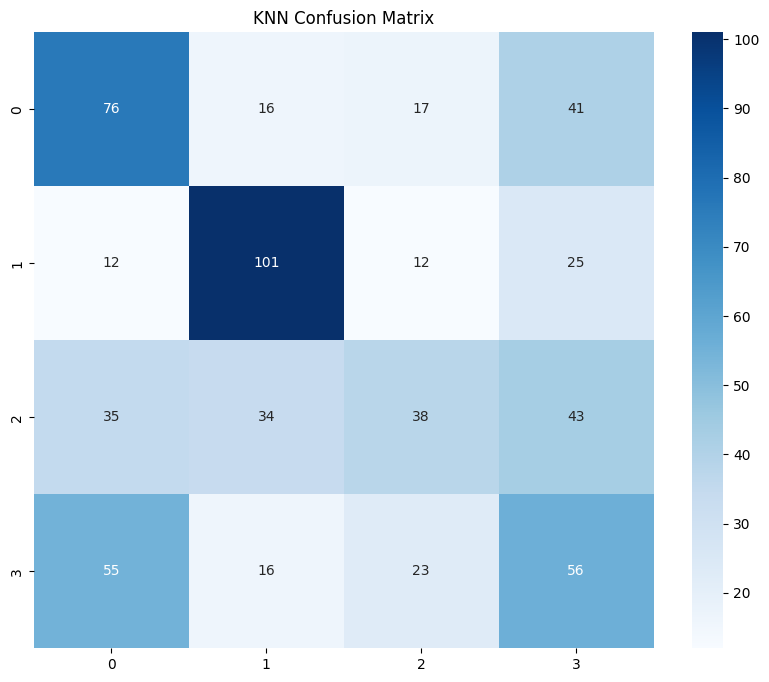

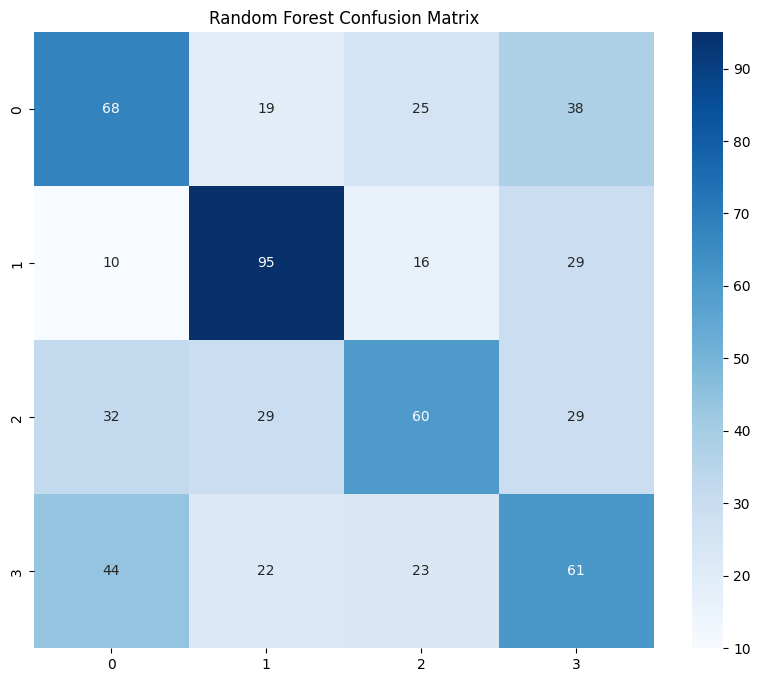

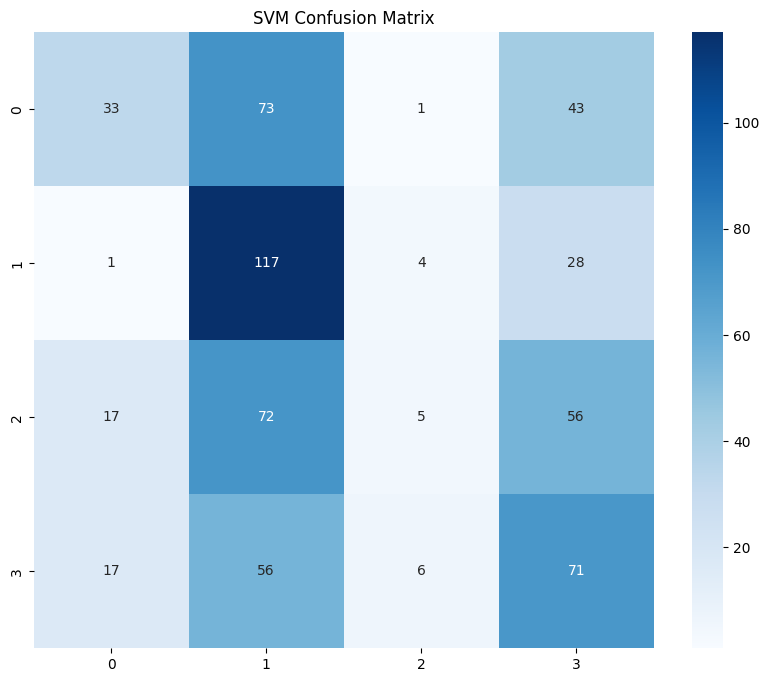

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_knn, annot=True, cmap="Blues", fmt="d")
plt.title("KNN Confusion Matrix")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_rforest, annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_svm, annot=True, cmap="Blues", fmt="d")
plt.title("SVM Confusion Matrix")
plt.show()